In [29]:
import bzpost
import math
import datetime
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os
import mkmosaic
import time

%matplotlib inline

In [11]:
ImgList = mkmosaic.download_fits('Imgs',2016,7,8,5,1,2016,7,8,6,1)

In [47]:
ImgSize = 349
ImgMid = math.floor(ImgSize / 2)
ImgPoint = [0,ImgMid]
ImgIndex = 2

LoadedImgs = []
for i in range(0,5):
    LoadedImgs.append(GetImg(ImgList[i]))

Img = np.zeros((ImgSize, 410))
SrcImg = GetImg(ImgList[0])

for idx in range(Img.shape[0]):
    Img[idx] = SrcImg[idx]

In [31]:
def rotate(l,n):
    """ 
    Rotates a list l by a number of places n.
    Sign of n is for changing direction of rotation. Behaves in the same way as np.roll
    """
    if n < 0:
        n = abs(n)
        return l[n:] + l[:n]
    else:
        
        return l[len(l)-n:] + l[:len(l)-n]

In [32]:
def GetImg(Img, ImgDir = "Imgs"):
    HduList = fits.open(os.path.join(ImgDir, Img))
    return HduList[1].data

In [49]:
def RollFwd(step, Img):
    """
    Rolls displayed image forward, adding newer data and removing older. Automaticly keeps track of what images are in use.
    """
    global ImgSize
    global ImgMid
    global ImgPoint
    global ImgIndex
    global LoadedImgs
    
    
    for row in range(0, step):
        np.roll(Img, -1, axis=1)
        if (ImgPoint[1]+3+ImgMid)>LoadedImgs[ImgPoint[0]].shape[0]:
            Img[-1] = LoadedImgs[ImgPoint[0]][ImgMid-(LoadedImgs[ImgPoint[0]].shape[0]-(ImgPoint[1]+1))-1]
            if(ImgPoint[1]+1)>= LoadedImgs[ImgPoint[0]].shape[0]:
                ImgPoint[0] += 1
                ImgPoint[1] = 0
            else:
                ImgPoint[1] += 1
        else:
            Img[-1] = LoadedImgs[ImgPoint[0]][ImgPoint[1]+ImgMid]
            ImgPoint[1] += 1
        if (ImgIndex+1)< len(ImgList):
            if ImgPoint[0] > 2:
                rotate(LoadedImgs,-1)
                LoadedImgs[-1] = GetImg(ImgList[ImgIndex+2])
                ImgIndex += 1
                ImgPoint[0] -= 1
        

In [46]:
def RollBck(step, Img):
    
    global ImgSize
    global ImgMid
    global ImgPoint
    global ImgIndex
    global LoadedImgs
    
    for row in range(0,step):
        np.roll(Img, 1, axis=1)
        if IMgPoint[1]<ImgMid:
            Img[1] = LoadedImgs[ImgPoint[0]-1][LoadedImgs[ImgPoint[0]-1].shape[0]-(ImgMid-(ImgPoint[1]+1)+1)]
            if ImgPoint[1]-1<0:
                ImgPoint[0] -= 1
                ImgPoint[1] = LoadedImgs[ImgPoint[0]].shape[0]-1
            else:
                ImgPoint[1] -= 1
        else:
            Img[1] = LoadedImgs[ImgPoint[0]][ImgPoint[1] - ImgMid]
            ImgPoint[1] -= 1
        if (ImgIndex+1)>2:
            if ImgPoint[0]<2:
                rotate(LoadedImgs,1)
                LoadedImgs[1] = GetImgs(ImgList[ImgIndex-2])
                ImgIndex -= 1
                ImgPoint[0] += 1

In [35]:
HduList = fits.open(os.path.join("Imgs", ImgList[2]))
HduList.info()

Filename: Imgs/20160708050241385_OBSUPICE-R3_snap.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       6   ()              
1                CompImageHDU     23   (410, 352)   float32   


In [36]:
GetImg("Imgs", ImgList[2]).shape

IOError: [Errno 2] No such file or directory: '20160708050241385_OBSUPICE-R3_snap.fits/Imgs'

In [3]:
asdf = [0,1,2,3,4]
rotate(asdf,1)

[4, 0, 1, 2, 3]

In [4]:
rotate(asdf,-1)

[1, 2, 3, 4, 0]

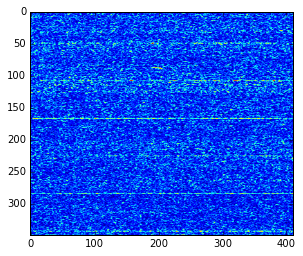

In [19]:
imgplot = plt.imshow(Img)

/opt/anaconda3/envs/python2.7/lib/python2.7/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/opt/anaconda3/envs/python2.7/lib/python2.7/site-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


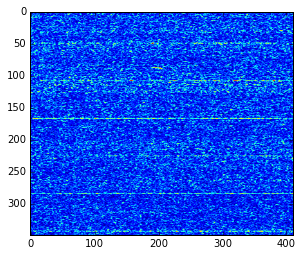

In [51]:
for i in range(20):
    imgplot=plt.imshow(Img)
    RollFwd(20, Img)
    time.sleep(2)